# **CNN 99% Model**

*“Simplicity is the ultimate sophistication.” — Leonardo da Vinci.*

*“Nature is pleased with simplicity.” — Isaac Newton.*

This model gives us the "Simplicity is the Best" Model which scores 99% in recal, precision, f1 score and testin accuracy


###**The model**

In [ ]:
# sequential model
model = Sequential()
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters= 32, kernel_size= 5, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(2, activation="softmax"))

# finetune the output layer neuron 64, 128, 256, 512, 1024 and 2048
# neuron 128, 256, 512, 1024 have very similar performance
# neuron 1024 is slightly better as the best
# neuron 64 is ok, but slightly worse than the previous 4 values
# neuron 2048 is ok, but slightly worse than the previous 4 values as well
# 1024 as the final 

# fine-tune final dropout layer's percentage 0, 0.3, 0.4 and 0.8
# both 0, 0.4 and 0.8 does not perform better than 0.3
# we will use 0.3 -  appropriate regularization at the end is optimal

# fine-tune Conv2D layer's filter 16, 32 and 64
# filter 16 and 64 won't perform better than 32
# tried 16, 32, 64 or 4, 16, 32 in sequence for the 3 layers, not better
# we will use 32/32/32 since it's the optimal

In [ ]:
# model.summary() 

In [ ]:
# plot_model(model, 
#            show_shapes = True, 
#            show_layer_names = True)

###**Compile the model**

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

# Fine-tune between Adam and SGD
# Adam converges very fast and performance better to 98-99 recall and 97-98 f1/test accuracy
# SGD generalizes up eventually delivers the best 99 recall, precision, f1 and test accuracy
# We chose SGD eventually

###**Use Callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', 
                           patience = 4),
             ModelCheckpoint('.mdl_wts.hdf5', 
                             monitor ='val_loss', 
                             save_best_only = True)]

# EarlyStopping: A class to stop training if a monitored metric is not improving
# patience: Number of epochs with no improvement after which training will be stopped
# patience: Higher patience could help to avoid stuck in the local minimum, but longer run time
# ModelCheckpoint: In callback to save the model's weights
# mdl_wts.hdf5: The file to save model weights (wts)
# hdf5 is "Hierarchical Data Format version 5"
# hdf5 is an open source file format that supports large, complex, heterogeneous data
# hdf5 uses a "file directory" to organize data within the file in many different structured ways
# save_best_only = True means saving the latest best model according to the metrics monitored

###**Fit and Train Model**

In [ ]:
# fit the model with min batch size as 32
# Batch size has to be factor of 2^power (8, 16, 32, 64, 128) to fit computer's memory

hist = model.fit(train_images,
                 train_labels,
                 batch_size = 32,
                 validation_split = 0.2,
                 callbacks = callbacks,
                 epochs = 30,
                 verbose = 1)

# Fine-tune batch size 32, 64
# batch size 32 seems the best, but not too much difference
# Fine-tune validation split 0.1, 0.2 and 0.3
# validation split 0.1 or 0.3 does not change anything from 0.2
# Will keep 0.2

Epoch 1/30
624/624 [==============================] - 6s 8ms/step - loss: 0.0627 - accuracy: 0.9777 - val_loss: 0.0561 - val_accuracy: 0.9850
Epoch 2/30
624/624 [==============================] - 5s 7ms/step - loss: 0.0577 - accuracy: 0.9801 - val_loss: 0.0607 - val_accuracy: 0.9868
Epoch 3/30
624/624 [==============================] - 5s 7ms/step - loss: 0.0556 - accuracy: 0.9804 - val_loss: 0.0657 - val_accuracy: 0.9822
Epoch 4/30
624/624 [==============================] - 5s 7ms/step - loss: 0.0492 - accuracy: 0.9817 - val_loss: 0.0565 - val_accuracy: 0.9848
Epoch 5/30
624/624 [==============================] - 5s 7ms/step - loss: 0.0441 - accuracy: 0.9832 - val_loss: 0.0621 - val_accuracy: 0.9832


### **Evaluate the Model**

In [ ]:
accuracy = model.evaluate(test_images, 
                          test_labels, 
                          verbose = 0)
print('\n', 'Test_Accuracy -', accuracy[1])


 Test_Accuracy - 0.9884615540504456


###**Train and Validation Accuracy**

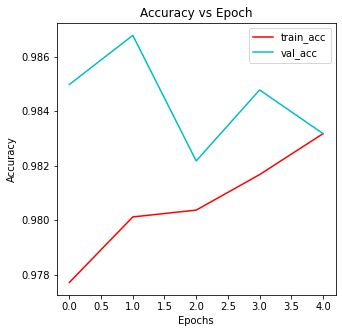

In [ ]:
# Set up function to plot train and validation accuracy 
L = len(hist.history["accuracy"])
plt.figure(figsize=(5,5))
plt.plot(np.arange(0, L), 
  hist.history["accuracy"], 
  label="train_acc",
  color='r')
plt.plot(np.arange(0, L), 
  hist.history["val_accuracy"], 
  label="val_acc",
  color='c')
plt.title("Accuracy vs Epoch")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="best");

### **Classification Report and Confusion Matrix**

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1300
           1       0.99      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



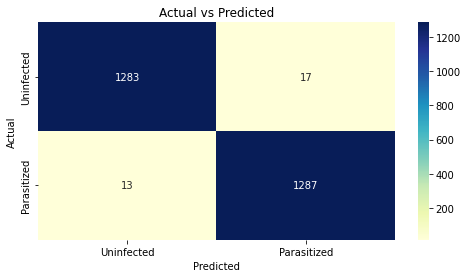

In [ ]:
# np.argmax returns the indices of the max values along axis 1
# print the classification report
pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_tru = np.argmax(test_labels, axis = 1)
print(classification_report(y_tru, pred))

# plot the heatmap with confusion matrix
cmat = confusion_matrix(y_tru, pred)
plt.figure(figsize=(8,4))
sns.heatmap(cmat, 
            annot = True, 
            fmt='.0f', 
            cmap="YlGnBu",
            xticklabels=['Uninfected', 'Parasitized'], 
            yticklabels=['Uninfected', 'Parasitized'])
plt.title('Actual vs Predicted')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#**Bottomline**

* **The Model for Simplicity, Broad Usage with Low cost** - A CNN model without augementation, fancy activation function, sophisticated regulation, lengthy layers or any pre-trained transer learning - reaches successfully homerun 99% in Recall, precision, f1-Score and Test Accuracy. It would be super easy to implement in the mobile or edge device for broad usage of this deep learning CNN model